## Problem Statement
    A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.,
    The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.,
    Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df_test = pd.read_csv('test.csv')
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [4]:
df = pd.concat([df_train, df_test], ignore_index=True)


In [5]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [6]:
df.drop('User_ID',axis =1,inplace =True)
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [7]:
#Handling categorical data in gender
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [8]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
#Handle categorical data age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
df['Age'] = df['Age'].map({'10-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [11]:
df['Age'].unique()

array([nan,  7.,  3.,  5.,  6.,  4.,  2.])

In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,NaN,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,NaN,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,NaN,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,NaN,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7.0,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
# Fixing cartegorical city category
df_city = pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [14]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [15]:
df = pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,NaN,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,NaN,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,NaN,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,NaN,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7.0,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [16]:
df.drop('City_Category',axis = 1,inplace= True)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,NaN,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,NaN,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,NaN,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,NaN,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7.0,16,4+,0,8,NaN,NaN,7969.0,False,True


In [18]:
# missing value 
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                            21334
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [19]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [21]:
# Replace the missing values with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2']).mode

In [22]:
df['Product_Category_2'].isnull().sum()

0

In [23]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3']).mode

In [24]:
df['Product_Category_3'].isnull().sum()

0

In [25]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,NaN,10,2,0,3,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,8370.0,False,False
1,P00248942,0,NaN,10,2,0,1,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,15200.0,False,False
2,P00087842,0,NaN,10,2,0,12,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,1422.0,False,False
3,P00085442,0,NaN,10,2,0,12,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,1057.0,False,False
4,P00285442,1,7.0,16,4+,0,8,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,7969.0,False,True


In [26]:
df.shape

(783667, 12)

In [27]:
#Staying current city years
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [29]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,NaN,10,2,0,3,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,8370.0,False,False
1,P00248942,0,NaN,10,2,0,1,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,15200.0,False,False
2,P00087842,0,NaN,10,2,0,12,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,1422.0,False,False
3,P00085442,0,NaN,10,2,0,12,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,1057.0,False,False
4,P00285442,1,7.0,16,4,0,8,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,7969.0,False,True


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         762333 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  object 
 8   Product_Category_3          783667 non-null  object 
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 61.3+ MB


In [31]:
# convert object into intergers 
df['Stay_In_Current_City_Years'] =df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         762333 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  object 
 8   Product_Category_3          783667 non-null  object 
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(2), int32(1), int64(4), object(3)
memory usage: 58.3

In [32]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         762333 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  object 
 8   Product_Category_3          783667 non-null  object 
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(2), int32(3), int64(4), object(3)
memory usage: 62.8+ MB


In [33]:
# Visualisation 
# sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Purchase'>

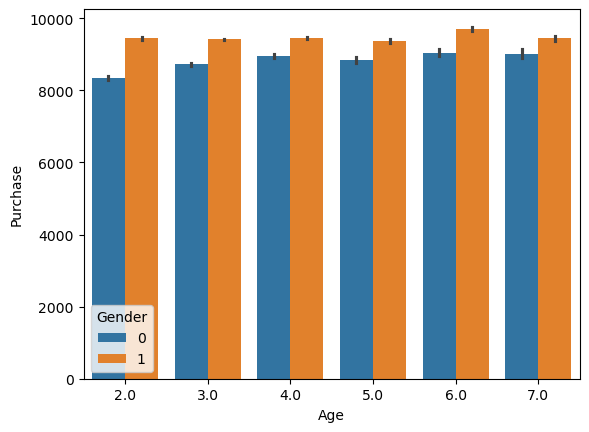

In [34]:
sns.barplot(x='Age',y='Purchase',hue ='Gender',data =df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

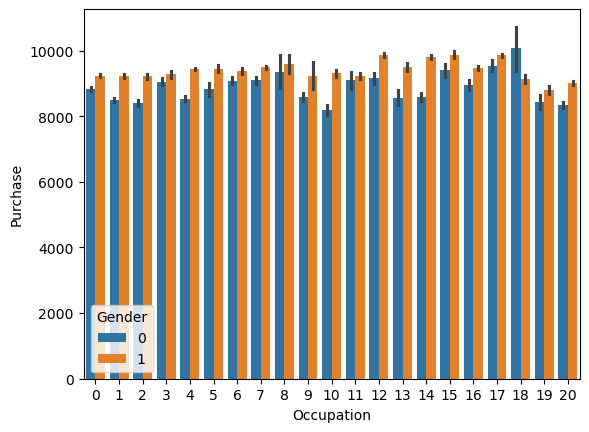

In [35]:
#Visulization of purchase with ocuupation
sns.barplot(x='Occupation',y='Purchase',hue ='Gender',data =df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

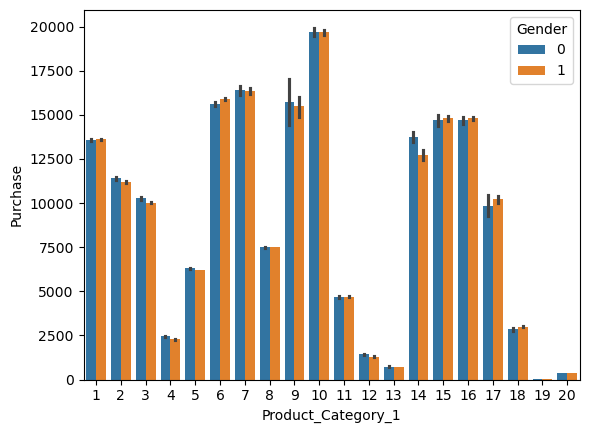

In [36]:
sns.barplot(x='Product_Category_1',y='Purchase',hue ='Gender',data =df)


KeyboardInterrupt



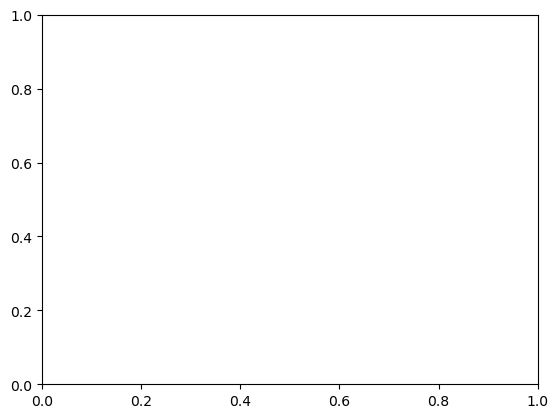

In [37]:
sns.barplot(x='Product_Category_2',y='Purchase',hue ='Gender',data =df)

KeyboardInterrupt: 

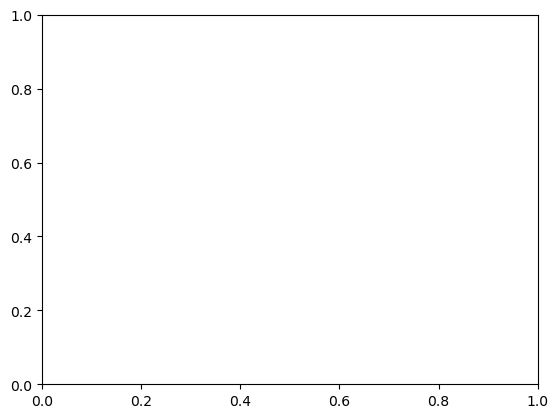

In [38]:
sns.barplot(x='Product_Category_3',y='Purchase',hue ='Gender',data =df)

In [39]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,NaN,10,2,0,3,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,8370.0,0,0
1,P00248942,0,NaN,10,2,0,1,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,15200.0,0,0
2,P00087842,0,NaN,10,2,0,12,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,1422.0,0,0
3,P00085442,0,NaN,10,2,0,12,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,1057.0,0,0
4,P00285442,1,7.0,16,4,0,8,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,7969.0,0,1


In [40]:
df.drop('Product_ID',axis =1)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,NaN,10,2,0,3,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,8370.0,0,0
1,0,NaN,10,2,0,1,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,15200.0,0,0
2,0,NaN,10,2,0,12,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,1422.0,0,0
3,0,NaN,10,2,0,12,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,1057.0,0,0
4,1,7.0,16,4,0,8,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
783662,0,3.0,15,4,1,8,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,NaN,1,0
783663,0,3.0,15,4,1,5,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,NaN,1,0
783664,0,3.0,15,4,1,1,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,NaN,1,0
783665,0,5.0,1,4,0,10,<bound method Series.mode of 0 NaN\n1...,<bound method Series.mode of 0 NaN\n1...,NaN,0,1


In [41]:
#Feature Scaling
df_test = df[df['Purchase'].isnull()]

In [42]:
df_train = df[~df['Purchase'].isnull()]

In [43]:
X_train.drop('Purchase',axis =1,inplace =True)
X_test.drop('Purchase',axis =1,inplace =True)
X.head()

NameError: name 'X_train' is not defined

In [ ]:
y= df_train['Purchase']
y

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.33, random_state = 42)

NameError: name 'X' is not defined

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit.T(X_train)
X_test = sc.transform(X_test)

AttributeError: 'function' object has no attribute 'T'

In [ ]:
# train your model to see